# 1. Import and Install Dependencies

In [1]:
%pip install mediapipe

     -------------------------------------- 49.0/49.0 MB 603.5 kB/s eta 0:00:00
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opencv-python


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
from utils.detector import Detector

# 2. Call detector class

In [3]:
mp_detect = Detector()

In [ ]:
# for testing

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

# 3. Setup Folders for Collection

In [4]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face')
# DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face_sintetic') 

# Actions that we try to detect
actions = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])

# 140 videos worth of data
no_sequences = 150

# Videos are going to be 50 frames in length
sequence_length = 50

# Folder start
# start_folder = 1

In [5]:
# for action in actions: 
# dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, '1'))).astype(int))
for action in actions: 
    for sequence in range(150, 300):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 4. Collect Keypoint Values for Training and Testing

In [6]:
# actions = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])
actions = np.array(['halo'])

In [8]:
for action in actions:
    for sequence in range(150, 200):
        cap = cv2.VideoCapture("F:/Work/2022/ifest-bisindo-translator/ml/dataset/{}/{}.mp4".format(action, sequence-150))
 
        with mp_detect.mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
            for frame_num in range(sequence_length):
                if frame_num > 1:
                    # Read feed
                    ret, frame = cap.read()

                    # Make detections
                    image, results = mp_detect.mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    mp_detect.draw_styled_landmarks(image, results)
                    
                    keypoints = mp_detect.extract_keypoints(results)
                    # 
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num-2))
                    np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                        
        cap.release()
        cv2.destroyAllWindows()

In [23]:
print(keypoints)


[ 0.52671254  0.23856722 -0.6998564  ...  0.          0.
  0.        ]


# 5. Preprocess Data and Create Labels and Features

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [3]:
# # actions = np.array(['hai', 'halo', 'nama', 'aku', 'saya','a','b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x' ,'y' ,'z'])
# actions = np.array(['hai', 'halo', 'nama', 'aku', 'saya', 'a','b', 'c'])
actions = np.array(['halo', 'nama', 'aku', 'perkenalkan', 'r', 'kami', 'd', 'a', 'n', 'i', 'y', 'l', 'u', 'g', 'm', 'NOTHING'])


In [4]:
label_map = {label:num for num, label in enumerate(actions)}

In [5]:
label_map

{'halo': 0,
 'nama': 1,
 'aku': 2,
 'perkenalkan': 3,
 'r': 4,
 'kami': 5,
 'd': 6,
 'a': 7,
 'n': 8,
 'i': 9,
 'y': 10,
 'l': 11,
 'u': 12,
 'g': 13,
 'm': 14,
 'NOTHING': 15}

In [6]:
DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face') 
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(45):
            # res = np.load("F:/Work/2022/ifest-bisindo-translator/ml/Dataset_Keypoints_Data/{}/{}.npy".format(action, frame_num))
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [14]:
np.array(sequences).shape

(2400, 45, 174)

In [15]:
np.array(labels).shape

(2400,)

In [ ]:
X = np.array(sequences)

In [ ]:
X.shape

(2400, 45, 174)

In [ ]:
y = to_categorical(labels).astype(int)

In [ ]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, shuffle=True)

In [ ]:
y_test.shape

(240, 16)

In [21]:
y_val.shape

(216, 16)

In [22]:
__dataname = ['X_test', 'y_test', 'X_train', 'X_val', 'y_train', 'y_val']
__data = [X_test,y_test, X_train, X_val, y_train, y_val]

for i in range(6):
    with open('{}.txt'.format(__dataname[i]), 'w') as f:
        f.write(__dataname[i])

In [70]:
X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, train_size=0.5, shuffle=True)
x_train_ = [X_train1, X_train2]
y_train_ = [y_train1, y_train2]

In [90]:
DATA_PATH = os.path.join('Dataset_Keypoints_Data_wo_face_sintetic') 
sequences2, labels2 = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(45):
            # res = np.load("F:/Work/2022/ifest-bisindo-translator/ml/Dataset_Keypoints_Data/{}/{}.npy".format(action, frame_num))
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences2.append(window)
        labels2.append(label_map[action])

In [91]:
y_train_2 = to_categorical(labels2).astype(int)
X_train_2 = np.array(sequences2)

# 7. Build and Train LSTM Neural Network

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard, Callback
from tensorflow.keras.optimizers import Adam

In [93]:
class trainingCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    
    # Check accuracy
    # if(logs.get('categorical_accuracy') < 0.95  and logs.get('loss') < 0.35 and logs.get('val_loss') < 0.35):
    if((logs.get('categorical_accuracy') > 0.97) or (logs.get('categorical_accuracy') > 0.95  and logs.get('loss') > logs.get('val_loss'))):
      # Stop if threshold is met
      print("\nAccuracy grater than 0.95 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = trainingCallback()

In [135]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [161]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(45,174)))
model.add(Dropout(0.5))
# model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(actions.shape[0], activation='softmax'))

In [159]:
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [132]:
# model_train = model.fit(X_train, y_train, epochs=10, batch_size=64,validation_data=(X_val,y_val), callbacks=[tb_callback])
model_train = model.fit(X_train, y_train, epochs=1000, batch_size=64,validation_data=(X_val,y_val), callbacks=[callbacks])
# model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000


KeyboardInterrupt: 

In [162]:
loss, val_loss, cat_accuracy = [], [], []
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
for _epochs in range(400):
    count = _epochs % 12
    if (count < 10 and (_epochs < 150 or (_epochs < 250 and _epochs > 200))):
        if (count < 4):
            x_train__ = x_train_[0]
            y_train__ = y_train_[0]
        elif (count < 8):
            x_train__ = x_train_[1]
            y_train__ = y_train_[1]
        elif (count < 10):
            x_train__ = X_train_2
            y_train__ = y_train_2
    else :
        x_train__ = X_train
        y_train__ = y_train
    model_train = model.fit(x_train__, y_train__, epochs=_epochs+1, batch_size=64,validation_data=(X_val,y_val),initial_epoch=_epochs)
    _loss = model_train.history['loss']
    _val_loss = model_train.history['val_loss']
    _cat_accuracy = model_train.history['categorical_accuracy']
    loss.append(_loss[len(_loss)-1])
    val_loss.append(_val_loss[len(_loss)-1])
    cat_accuracy.append(_cat_accuracy[len(_loss)-1])
    if (loss[len(loss)-1] < val_loss[len(loss)-1] and cat_accuracy[len(loss)-1] > 0.96):
        break





16/16 [==============================] - 6s 181ms/step - loss: 2.7854 - categorical_accuracy: 0.0669 - val_loss: 2.7371 - val_categorical_accuracy: 0.1111
Epoch 2/2
16/16 [==============================] - 2s 157ms/step - loss: 2.7644 - categorical_accuracy: 0.0874 - val_loss: 2.7248 - val_categorical_accuracy: 0.1574
Epoch 3/3
16/16 [==============================] - 2s 154ms/step - loss: 2.7456 - categorical_accuracy: 0.0844 - val_loss: 2.7046 - val_categorical_accuracy: 0.2176
Epoch 4/4
16/16 [==============================] - 2s 153ms/step - loss: 2.7287 - categorical_accuracy: 0.1080 - val_loss: 2.6815 - val_categorical_accuracy: 0.2222
Epoch 5/5
16/16 [==============================] - 2s 155ms/step - loss: 2.7080 - categorical_accuracy: 0.0988 - val_loss: 2.6286 - val_categorical_accuracy: 0.2500
Epoch 6/6
16/16 [==============================] - 3s 166ms/step - loss: 2.6854 - categorical_accuracy: 0.1142 - val_loss: 2.5734 - val_categorical_accuracy: 0.2593
Epoch 7/7
16/16 [===

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 45, 128)           155136    
                                                                 
 dropout_9 (Dropout)         (None, 45, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 16)               

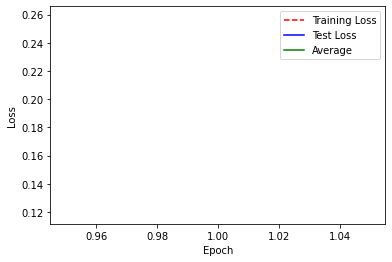

In [165]:
# Get training and test loss histories
training_loss = model_train.history['loss']
test_loss = model_train.history['val_loss']
avg = []

for i in range(len(loss)):
    sum = loss[i]+val_loss[i]
    avg.append(sum/2)

# avg = np.array([training_loss, test_loss])
# np.average(avg)

# Create count of the number of epochs
epoch_count = range(1, len(loss) + 1)

# Visualize loss history
plt.plot(epoch_count, loss, 'r--')
plt.plot(epoch_count, val_loss, 'b-')
plt.plot(epoch_count, avg, 'g-')
plt.legend(['Training Loss', 'Test Loss', 'Average'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
# print(avg)

# 8. Make Predictions

In [35]:
res = model.predict(X_test)

8/8 [==============================] - 1s 28ms/step


In [36]:
actions[np.argmax(res[3])]

'n'

In [37]:
actions[np.argmax(y_test[3])]

'm'

# 9. Save Weights

In [89]:
model.save('model_5.h5')

In [217]:
del model

In [29]:
model.load_weights('model_2.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [39]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [166]:
yhat = model.predict(X_test)

8/8 [==============================] - 1s 37ms/step


In [167]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [44]:
confussionMatrix = multilabel_confusion_matrix(ytrue, yhat)

In [110]:
print(confussionMatrix)
with open('confussionMatrixModel_2.txt', 'w') as f:
    f.write(str(confussionMatrix))

[[[228   0]
  [  0  12]]

 [[222   0]
  [  2  16]]

 [[226   0]
  [  1  13]]

 [[224   2]
  [  0  14]]

 [[220   5]
  [  0  15]]

 [[227   0]
  [  2  11]]

 [[226   1]
  [  1  12]]

 [[217   0]
  [  2  21]]

 [[223   5]
  [  0  12]]

 [[220   0]
  [  2  18]]

 [[230   1]
  [  0   9]]

 [[222   2]
  [  4  12]]

 [[224   2]
  [  2  12]]

 [[223   0]
  [  0  17]]

 [[223   2]
  [  4  11]]

 [[225   0]
  [  0  15]]]


In [168]:
accuracy = accuracy_score(ytrue, yhat)
print(accuracy)
# with open('accuracyScoreModel_2.txt', 'w') as f:
#     f.write(str(accuracy))

0.9416666666666667


# 11. Test in Real Time

In [31]:
from scipy import stats

In [32]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [220]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [33]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-25:]
        
        if len(sequence) == 25:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            # image = prob_viz(res, actions, image, colors)
            
        # cv2.rectangle(image, (0,0), (320, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti